<a href="https://colab.research.google.com/github/ksh168/ML/blob/master/comparison_between_different_ML_algorithms_on_same_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'
data = pd.read_csv('/content/drive/My Drive/datasets/data_WEEK4.csv')

In [4]:
data.head()

,price,year,mileage,color,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,silver,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,silver,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,blue,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,red,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,white,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [0]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [6]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [0]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

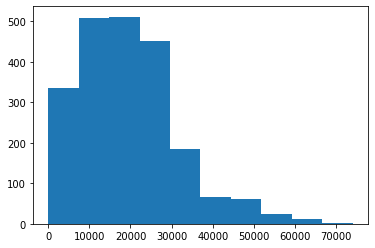

In [8]:
plt.hist(data['price']);

IT IS LEFT-SKEWED<br>
We will either use log transform or sqrt transform

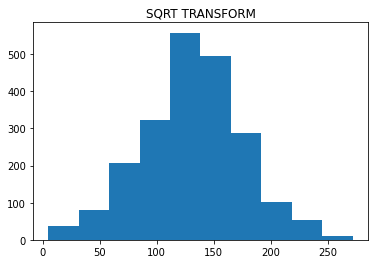

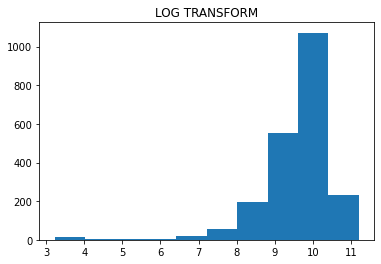

In [9]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [0]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [0]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [12]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1722, 25)
(431, 25)
(1722,)
(431,)


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " 
      + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))

print("Linear Regression Testing R2 score is " 
      + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))

#CODE FOR MEAN SQUARE ERROR AND MEAN

print('Linear Regression Training mean_square_error is '
      + str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))

print('Linear Regression Testing mean_square_error is '
      + str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))

print('Linear Regression Training mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))

print('Linear Regression Testing mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))


Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017768
Linear Regression Testing mean_absolute_error is 6926.987292556893


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [0]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data

dtr_model = DecisionTreeRegressor(criterion = 'mse', max_depth = 7, random_state = 1)


In [15]:
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [16]:
dtr_model.score(X_test, y_test)

0.462261990177796

In [17]:
print("Decision Tree Training R2 score is " + str(r2_score(np.square(y_train),np.square(dtr_model.predict(X_train)))))
print("Decision Tree Testing R2 score is " + str(r2_score(np.square(y_test),np.square(dtr_model.predict(X_test)))))

print('Decision Tree Training mean_square_error is '
      + str(mean_squared_error(np.square(y_train),np.square(dtr_model.predict(X_train)))))

print('Decision Tree Testing mean_square_error is '
      + str(mean_squared_error(np.square(y_test),np.square(dtr_model.predict(X_test)))))

print('Decision Tree Training mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_train),np.square(dtr_model.predict(X_train)))))

print('Decision Tree Testing mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_test),np.square(dtr_model.predict(X_test)))))


Decision Tree Training R2 score is 0.422869230755335
Decision Tree Testing R2 score is 0.36145560633416207
Decision Tree Training mean_square_error is 81776562.90835412
Decision Tree Testing mean_square_error is 90131889.2396716
Decision Tree Training mean_absolute_error is 6266.244817595775
Decision Tree Testing mean_absolute_error is 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [18]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, 
# C(regularization parameter) as 0.1 
# FIT THE DATA
# Calculate the R2_score, mse, mae for training data as well as testing data.

svr_model = SVR(C = 0.1, kernel = 'poly', max_iter = 3000)
svr_model.fit(X_train, y_train)
svr_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


-0.008450363786433712

In [19]:
print("SVM Training R2 score is " + str(r2_score(np.square(y_train),np.square(svr_model.predict(X_train)))))
print("SVM Testing R2 score is " + str(r2_score(np.square(y_test),np.square(svr_model.predict(X_test)))))

print('SVM Training mean_square_error is '
      + str(mean_squared_error(np.square(y_train),np.square(svr_model.predict(X_train)))))

print('SVM Testing mean_square_error is '
      + str(mean_squared_error(np.square(y_test),np.square(svr_model.predict(X_test)))))

print('SVM Training mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_train),np.square(svr_model.predict(X_train)))))

print('SVM Testing mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_test),np.square(svr_model.predict(X_test)))))


SVM Training R2 score is 0.007915403184097003
SVM Testing R2 score is 0.00604912802146873
SVM Training mean_square_error is 140573458.85076421
SVM Testing mean_square_error is 140298263.9758738
SVM Training mean_absolute_error is 9282.918138184208
SVM Testing mean_absolute_error is 9235.841039000066


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [20]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1
# (read documentation for more details) and random state as 1 
# FIT THE DATA
# Calculate the R2_score, mse, mae for training data as well as testing data.

rfr_model = RandomForestRegressor(n_estimators = 200, max_depth = 9, n_jobs = -1, random_state = 1)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [21]:
print("Random Forest Training R2 score is " + str(r2_score(np.square(y_train),np.square(rfr_model.predict(X_train)))))
print("Random Forest Testing R2 score is " + str(r2_score(np.square(y_test),np.square(rfr_model.predict(X_test)))))

print('Random Forest Training mean_square_error is '
      + str(mean_squared_error(np.square(y_train),np.square(rfr_model.predict(X_train)))))

print('Random Forest Testing mean_square_error is '
      + str(mean_squared_error(np.square(y_test),np.square(rfr_model.predict(X_test)))))

print('Random Forest Training mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_train),np.square(rfr_model.predict(X_train)))))

print('Random Forest Testing mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_test),np.square(rfr_model.predict(X_test)))))


Random Forest Training R2 score is 0.5524364393379151
Random Forest Testing R2 score is 0.3997413290406362
Random Forest Training mean_square_error is 63417533.12143005
Random Forest Testing mean_square_error is 84727778.65210524
Random Forest Training mean_absolute_error is 5528.669046457424
Random Forest Testing mean_absolute_error is 6695.668840563838


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [22]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [0]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1

In [24]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [27]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 
# and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# CODE TO FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USING THE IMPORTED CONFUSION MATRIX

lgr_model = LogisticRegression(solver = 'lbfgs', max_iter = 2000, C = 0.5, penalty = 'l2', random_state = 1)
lgr_model.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lgr_model.score(X_test, y_test)  #accuracy

0.7215777262180975

In [0]:
y_pred = lgr_model.predict(X_test)

In [30]:
results = confusion_matrix(y_train, lgr_model.predict(X_train))
print ('Train Confusion Matrix :')
print(results)

Train Confusion Matrix :
[[782 231]
 [248 461]]


In [31]:
print('for training')
tn, fp, fn, tp = confusion_matrix(y_train, lgr_model.predict(X_train)).ravel()

for training


In [32]:
print('for training')
# also called sensitivity
tpr = tp/(tp+fn)
print('TPR: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('FPR: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('ACCURACY: ',accuracy)

for training
TPR:  0.6502115655853314
FPR:  0.228035538005923
ACCURACY:  0.721835075493612


In [33]:
results = confusion_matrix(y_test, y_pred)
print ('Test Confusion Matrix :')
print(results)

Test Confusion Matrix :
[[188  55]
 [ 65 123]]


In [34]:
print('for testing')
tn, fp, fn, tp = confusion_matrix(y_test, lgr_model.predict(X_test)).ravel()

for testing


In [35]:
print('for testing')
# also called sensitivity
tpr = tp/(tp+fn)
print('tpr: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('fpr: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy: ',accuracy)

tnr = tn/(tn+fp)
print('tnr: ',tnr)

for testing
tpr:  0.6542553191489362
fpr:  0.22633744855967078
accuracy:  0.7215777262180975
tnr:  0.7736625514403292


### Some points to remember

sensitivity, recall, hit rate, or true positive rate (TPR) all are same

specificity, selectivity or true negative rate (TNR) all are same

precision or positive predictive value (PPV) are same

miss rate or false negative rate (FNR) are same

fall-out or false positive rate (FPR) are same

In [0]:
# let's check them with inbuilt functions

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [38]:
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Classification Report : ')
print (classification_report(y_test, y_pred))

Accuracy Score : 0.7215777262180975
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       243
         1.0       0.69      0.65      0.67       188

    accuracy                           0.72       431
   macro avg       0.72      0.71      0.72       431
weighted avg       0.72      0.72      0.72       431



In [39]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# CODE TO FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USING THE IMPORTED CONFUSION MATRIX

# START CODE
svc_model = SVC(kernel = 'rbf', max_iter = 1000, random_state = 1, gamma = 'scale')
# END CODE
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svc_model.predict(X_test)

In [41]:
svc_model.score(X_test, y_test)

0.7192575406032483

In [42]:
results = confusion_matrix(y_train, svc_model.predict(X_train))
print ('Train Confusion Matrix :')
print(results)

Train Confusion Matrix :
[[862 151]
 [350 359]]


In [43]:
print('for training')
tn, fp, fn, tp = confusion_matrix(y_train, svc_model.predict(X_train)).ravel()

for training


In [44]:
print('for training')
# also called sensitivity
tpr = tp/(tp+fn)
print('TPR: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('FPR: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('ACCURACY: ',accuracy)

for training
TPR:  0.5063469675599436
FPR:  0.14906219151036526
ACCURACY:  0.7090592334494773


In [45]:
results = confusion_matrix(y_test, y_pred)
print ('Test Confusion Matrix :')
print(results)

Test Confusion Matrix :
[[209  34]
 [ 87 101]]


In [46]:
print('for testing')
tn, fp, fn, tp = confusion_matrix(y_test, svc_model.predict(X_test)).ravel()

for testing


In [47]:
print('for testing')
# also called sensitivity
tpr = tp/(tp+fn)
print('tpr: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('fpr: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy: ',accuracy)

#specificity, selectivity or true negative rate
tnr = tn/(tn+fp)
print('tnr: ',tnr)

for testing
tpr:  0.5372340425531915
fpr:  0.13991769547325103
accuracy:  0.7192575406032483
tnr:  0.8600823045267489


In [48]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# CODE TO FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USING THE IMPORTED CONFUSION MATRIX

dtc_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dtc_model.fit(X_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [49]:
dtc_model.score(X_test, y_test)

0.7540603248259861

In [0]:
y_pred = dtc_model.predict(X_test)

In [51]:
results = confusion_matrix(y_train, dtc_model.predict(X_train))
print ('Train Confusion Matrix :')
print(results)

Train Confusion Matrix :
[[864 149]
 [343 366]]


In [52]:
print('for training')
tn, fp, fn, tp = confusion_matrix(y_train, dtc_model.predict(X_train)).ravel()

for training


In [53]:
print('for training')
# also called sensitivity
tpr = tp/(tp+fn)
print('TPR: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('FPR: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('ACCURACY: ',accuracy)

#specificity, selectivity or true negative rate
tnr = tn/(tn+fp)
print('tnr: ',tnr)

for training
TPR:  0.5162200282087447
FPR:  0.14708785784797632
ACCURACY:  0.7142857142857143
tnr:  0.8529121421520237


In [54]:
results = confusion_matrix(y_test, y_pred)
print ('Test Confusion Matrix :')
print(results)

Test Confusion Matrix :
[[217  26]
 [ 80 108]]


In [55]:
print('for testing')
tn, fp, fn, tp = confusion_matrix(y_test, dtc_model.predict(X_test)).ravel()

for testing


In [56]:
print('for testing')
# also called sensitivity
tpr = tp/(tp+fn)
print('tpr: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('fpr: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy: ',accuracy)

#specificity, selectivity or true negative rate
tnr = tn/(tn+fp)
print('tnr: ',tnr)

for testing
tpr:  0.574468085106383
fpr:  0.10699588477366255
accuracy:  0.7540603248259861
tnr:  0.8930041152263375


In [57]:
print("Decision Tree Training R2 score is " + str(r2_score(np.square(y_train),np.square(dtc_model.predict(X_train)))))
print("Decision Tree Testing R2 score is " + str(r2_score(np.square(y_test),np.square(dtc_model.predict(X_test)))))

print('Decision Tree Training mean_square_error is '
      + str(mean_squared_error(np.square(y_train),np.square(dtc_model.predict(X_train)))))

print('Decision Tree Testing mean_square_error is '
      + str(mean_squared_error(np.square(y_test),np.square(dtc_model.predict(X_test)))))

print('Decision Tree Training mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_train),np.square(dtc_model.predict(X_train)))))

print('Decision Tree Testing mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_test),np.square(dtc_model.predict(X_test)))))


Decision Tree Training R2 score is -0.17962120083484545
Decision Tree Testing R2 score is -4.3779003590094234e-05
Decision Tree Training mean_square_error is 0.2857142857142857
Decision Tree Testing mean_square_error is 0.2459396751740139
Decision Tree Training mean_absolute_error is 0.2857142857142857
Decision Tree Testing mean_absolute_error is 0.2459396751740139


In [58]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' 
# and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# CODE TO FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USING THE IMPORTED CONFUSION MATRIX

rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 3, criterion = 'gini', random_state = 1)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rfc_model.predict(X_test)

In [60]:
rfc_model.score(X_test, y_test)

0.7424593967517401

In [61]:
results = confusion_matrix(y_train, rfc_model.predict(X_train))
print ('Train Confusion Matrix :')
print(results)

Train Confusion Matrix :
[[891 122]
 [323 386]]


In [62]:
print('for training')
tn, fp, fn, tp = confusion_matrix(y_train, rfc_model.predict(X_train)).ravel()

for training


In [63]:
print('for training')
# also called sensitivity
tpr = tp/(tp+fn)
print('TPR: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('FPR: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('ACCURACY: ',accuracy)

for training
TPR:  0.5444287729196051
FPR:  0.12043435340572557
ACCURACY:  0.7415795586527294


In [64]:
results = confusion_matrix(y_test, y_pred)
print ('Test Confusion Matrix :')
print(results)

Test Confusion Matrix :
[[214  29]
 [ 82 106]]


In [65]:
print('for testing')
tn, fp, fn, tp = confusion_matrix(y_test, rfc_model.predict(X_test)).ravel()

for testing


In [66]:
print('for testing')
# also called sensitivity
tpr = tp/(tp+fn)
print('tpr: ', tpr)

# also called fall out
fpr = fp/(fp+tn)
print('fpr: ',fpr)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy: ',accuracy)

tnr = tn/(tn+fp)
print('tnr: ',tnr)

for testing
tpr:  0.5638297872340425
fpr:  0.11934156378600823
accuracy:  0.7424593967517401
tnr:  0.8806584362139918


In [67]:
print("Random Forest Training R2 score is " + str(r2_score(np.square(y_train),np.square(rfc_model.predict(X_train)))))
print("Random Forest Testing R2 score is " + str(r2_score(np.square(y_test),np.square(rfc_model.predict(X_test)))))

print('Random Forest Training mean_square_error is '
      + str(mean_squared_error(np.square(y_train),np.square(rfc_model.predict(X_train)))))

print('Random Forest Testing mean_square_error is '
      + str(mean_squared_error(np.square(y_test),np.square(rfc_model.predict(X_test)))))

print('Random Forest Training mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_train),np.square(rfc_model.predict(X_train)))))

print('Random Forest Testing mean_absolute_error is '
      + str(mean_absolute_error(np.square(y_test),np.square(rfc_model.predict(X_test)))))


Random Forest Training R2 score is -0.0669338096981833
Random Forest Testing R2 score is -0.04721565537168404
Random Forest Training mean_square_error is 0.2584204413472706
Random Forest Testing mean_square_error is 0.25754060324825984
Random Forest Training mean_absolute_error is 0.2584204413472706
Random Forest Testing mean_absolute_error is 0.25754060324825984
